In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv('/Users/jiyoon/Downloads/customer_churn_dataset-testing-master.csv',delimiter=',')
pd.set_option('display.max_columns',None)

In [5]:
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.shape)
print(df.describe(include='all'))
print(df['Gender'].value_counts())
print(df['Subscription Type'].value_counts())
print(df['Contract Length'].value_counts())

   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0  
<c

In [7]:
df['Gender']=df['Gender'].map({'Female':0, 'Male':1})
df['Subscription Type']=df['Subscription Type'].map({'Standard':0, 'Basic':1, 'Premium':2})
df['Contract Length']=df['Contract Length'].map({'Monthly':0, 'Annual':1, 'Quarterly':2})

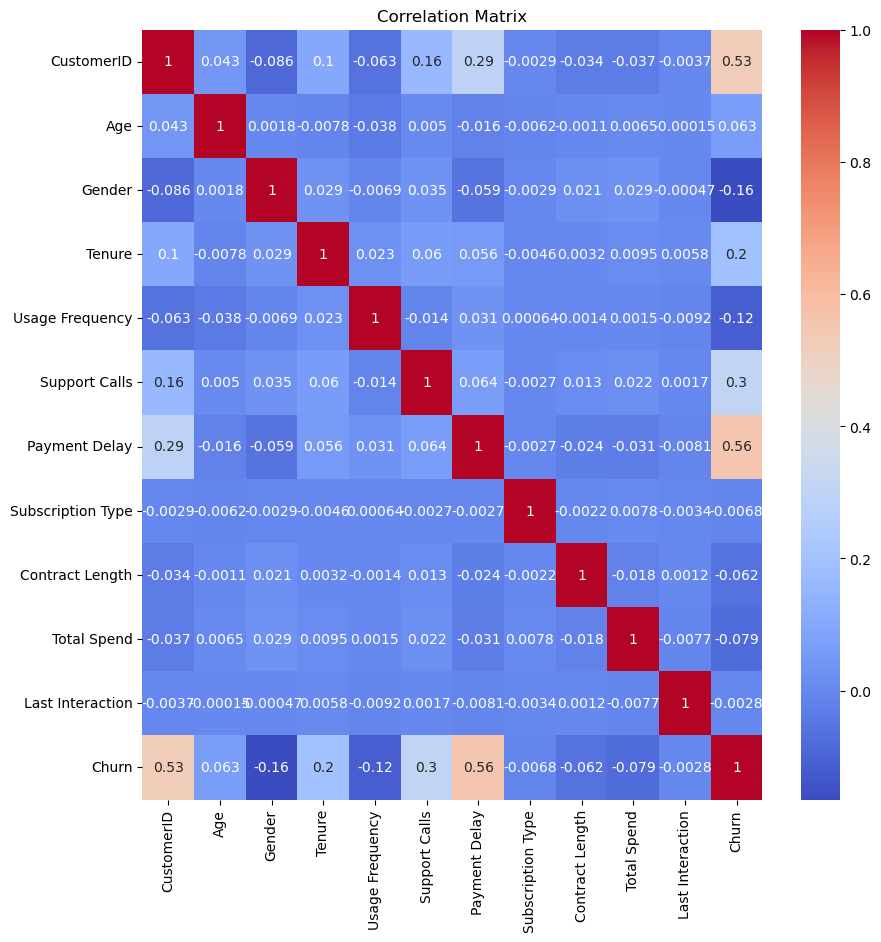

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

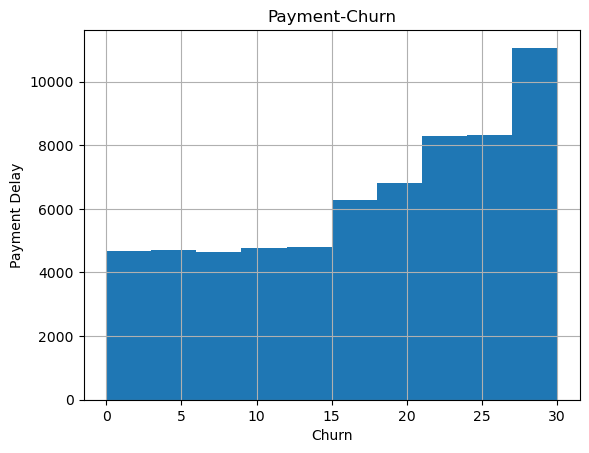

In [11]:
df['Payment Delay'].hist(bins=10)
plt.xlabel('Churn')
plt.ylabel('Payment Delay')
plt.title('Payment-Churn')
plt.show()

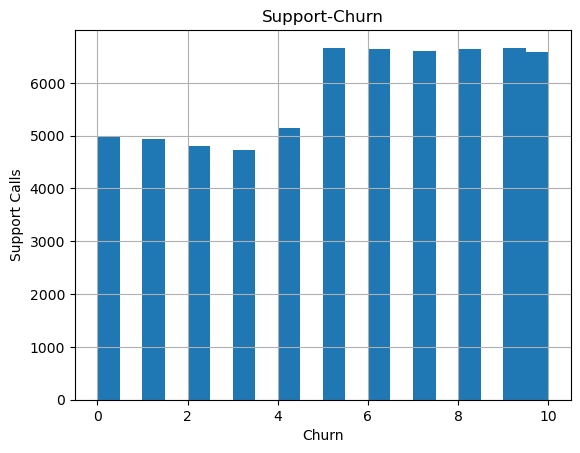

In [13]:
df['Support Calls'].hist(bins=20)
plt.xlabel('Churn')
plt.ylabel('Support Calls')
plt.title('Support-Churn')
plt.show()

In [15]:
#Payment Delay 가 증가할수록 Churn 증가
#Support Calls 가 증가할수록 Churn 증가

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[['Payment Delay','Churn']]=scaler.fit_transform(df[['Payment Delay','Churn']])
df[['Support Calls','Churn']]=scaler.fit_transform(df[['Support Calls','Churn']])

print(df[['Payment Delay','Churn']])
print(df[['Support Calls','Churn']])

       Payment Delay  Churn
0           0.900000    1.0
1           0.433333    0.0
2           0.966667    0.0
3           0.566667    0.0
4           0.066667    0.0
...              ...    ...
64369       0.700000    1.0
64370       0.733333    1.0
64371       1.000000    1.0
64372       0.733333    1.0
64373       0.833333    1.0

[64374 rows x 2 columns]
       Support Calls  Churn
0                0.4    1.0
1                0.7    0.0
2                0.2    0.0
3                0.5    0.0
4                0.9    0.0
...              ...    ...
64369            0.6    1.0
64370            0.5    1.0
64371            0.8    1.0
64372            0.7    1.0
64373            0.9    1.0

[64374 rows x 2 columns]


In [19]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df[['Payment Delay','Churn']]=scaler.fit_transform(df[['Payment Delay','Churn']])
df[['Support Calls','Churn']]=scaler.fit_transform(df[['Support Calls','Churn']])

print(df[['Payment Delay','Churn']])
print(df[['Support Calls','Churn']])

       Payment Delay     Churn
0           1.114538  1.054091
1          -0.467000 -0.948685
2           1.340472 -0.948685
3          -0.015132 -0.948685
4          -1.709637 -0.948685
...              ...       ...
64369       0.436736  1.054091
64370       0.549703  1.054091
64371       1.453439  1.054091
64372       0.549703  1.054091
64373       0.888604  1.054091

[64374 rows x 2 columns]
       Support Calls     Churn
0          -0.449807  1.054091
1           0.513590 -0.948685
2          -1.092072 -0.948685
3          -0.128674 -0.948685
4           1.155855 -0.948685
...              ...       ...
64369       0.192458  1.054091
64370      -0.128674  1.054091
64371       0.834723  1.054091
64372       0.513590  1.054091
64373       1.155855  1.054091

[64374 rows x 2 columns]


In [21]:
from scipy import stats

group1 = df[df['Churn'] == 0]
group2 = df[df['Churn'] == 1]

t_stat, p_value = stats.ttest_ind(group1['Payment Delay'], group2['Payment Delay'])
print(f't-statistic: {t_stat}, p-value: {p_value}')

if p_value < 0.05:
    print('두 그룹 간의 Payment Delay 평균에 유의미한 차이가 있습니다.')
else:
    print('두 그룹 간의 Payment Delay 평균에 유의미한 차이가 없습니다.')

#이탈한 고객이 더 높은 결제 지연 횟수를 가지고 있을 수 있다는 것을 의미

t-statistic: nan, p-value: nan
두 그룹 간의 Payment Delay 평균에 유의미한 차이가 없습니다.
